# Based on  Riess et. al 2016

In [1]:
import numpy as np
from numpy import power as pw
import matplotlib.pyplot as plt
from iminuit import Minuit
import matplotlib.gridspec as gridspec
from astropy.io.ascii import read as aread
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Riess et al. 2016

### Data load and visualisation

In [2]:
data_cephe = aread('./Cepheids data/table4.dat',readme='./Cepheids data/zzz_ReadMe')

data_names_sn=['Gal', 'SN_id', 'mag+5a', 'sig_mag+5a', 'mu_i', 'sig_mu_i', 'M0', 'sigM0']
data_sn_R16=aread("./Cepheids data/R16_SN.txt",names=data_names_sn)

In [3]:
data_cephe.sort('Gal')
data_cephe

Gal,RAdeg,DEdeg,ID,Per,V-I,F160W,sigTot,[O/H]
,deg,deg,,d,mag,mag,mag,[-]
str5,float64,float64,str8,float64,float64,float64,float64,float64
M101,210.87979,54.33376,115287,17.95,0.96,22.47,0.3,9.134
M101,210.74431,54.33044,94097,10.46,1.32,22.68,0.41,9.174
M101,210.74829,54.33198,81242,11.52,1.05,22.96,0.36,9.183
M101,210.74632,54.33275,92329,23.08,1.09,22.4,0.22,9.181
M101,210.7457,54.33207,93020,19.31,1.55,22.69,0.29,9.179
M101,210.74564,54.3309,90168,5.98,1.05,23.93,0.39,9.177
M101,210.74648,54.3348,97872,24.6,1.13,22.5,0.21,9.184
M101,210.7382,54.31904,86123,17.77,1.1,22.79,0.22,9.142


In [4]:
data_sn_R16.sort('Gal')
data_sn_R16

Gal,SN_id,mag+5a,sig_mag+5a,mu_i,sig_mu_i,M0,sigM0
str5,str6,float64,float64,float64,float64,float64,float64
M101,2011fe,13.31,0.117,29.135,0.045,-19.389,0.125
N1015,2009ig,17.015,0.123,32.497,0.081,-19.047,0.147
N1309,2002fk,16.756,0.116,32.523,0.055,-19.331,0.128
N1365,2012fr,15.482,0.125,31.307,0.057,-19.39,0.137
N1448,2001el,15.765,0.116,31.311,0.045,-19.111,0.125
N2442,2015F,15.84,0.142,31.511,0.053,-19.236,0.152
N3021,1995al,16.527,0.117,32.498,0.09,-19.535,0.147
N3370,1994ae,16.476,0.115,32.072,0.049,-19.161,0.125
N3447,2012ht,16.265,0.124,31.908,0.043,-19.207,0.131


In [5]:
host_list = sorted(set(data_cephe['Gal']))
sn_host = sorted(set(data_sn_R16['Gal']))

In [6]:
#DEFINITION DES MESURES EXTERNES
R=0.39

aB=0.71273
sig_aB=0.00176

mu_N4258 = 29.387
sig_mu_N4258 = 0.0568

In [7]:
data_cephe['mw'] = data_cephe['F160W']-R*data_cephe['V-I']

In [8]:
data_cephe.sort('Gal')
data_cephe

Gal,RAdeg,DEdeg,ID,Per,V-I,F160W,sigTot,[O/H],mw
,deg,deg,,d,mag,mag,mag,[-],mag
str5,float64,float64,str8,float64,float64,float64,float64,float64,float64
M101,210.87979,54.33376,115287,17.95,0.96,22.47,0.3,9.134,22.095599999999997
M101,210.89227,54.36125,148312,11.86,1.07,22.94,0.32,9.113,22.5227
M101,210.89351,54.36826,164932,14.92,1.13,23.03,0.32,9.105,22.5893
M101,210.87982,54.33565,121146,11.86,0.96,23.14,0.45,9.136,22.7656
M101,210.89249,54.36142,147959,7.762,1.01,23.79,0.42,9.113,23.3961
M101,210.87549,54.34114,157556,25.57,1.14,22.75,0.19,9.148,22.3054
M101,210.88855,54.34493,112715,8.173,0.97,23.8,0.42,9.124,23.4217
M101,210.88664,54.34654,126118,6.969,0.83,23.84,0.43,9.129,23.5163


In [9]:
data_sn_R16['mB'] = data_sn_R16['mag+5a'] - 5*aB
data_sn_R16['sig_mB'] = np.sqrt(pw(data_sn_R16['sig_mag+5a'],2)-pw(sig_aB,2))
data_sn_R16

Gal,SN_id,mag+5a,sig_mag+5a,mu_i,sig_mu_i,M0,sigM0,mB,sig_mB
str5,str6,float64,float64,float64,float64,float64,float64,float64,float64
M101,2011fe,13.31,0.117,29.135,0.045,-19.389,0.125,9.74635,0.11698676164421341
N1015,2009ig,17.015,0.123,32.497,0.081,-19.047,0.147,13.451350000000001,0.12298740748548202
N1309,2002fk,16.756,0.116,32.523,0.055,-19.331,0.128,13.192350000000001,0.11598664750737475
N1365,2012fr,15.482,0.125,31.307,0.057,-19.39,0.137,11.91835,0.12498760898585107
N1448,2001el,15.765,0.116,31.311,0.045,-19.111,0.125,12.201350000000001,0.11598664750737475
N2442,2015F,15.84,0.142,31.511,0.053,-19.236,0.152,12.27635,0.14198909253882847
N3021,1995al,16.527,0.117,32.498,0.09,-19.535,0.147,12.963350000000002,0.11698676164421341
N3370,1994ae,16.476,0.115,32.072,0.049,-19.161,0.125,12.91235,0.1149865313852018
N3447,2012ht,16.265,0.124,31.908,0.043,-19.207,0.131,12.701350000000001,0.12398750904829083


#### Plot

<ipython-input-10-e363674870ca>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


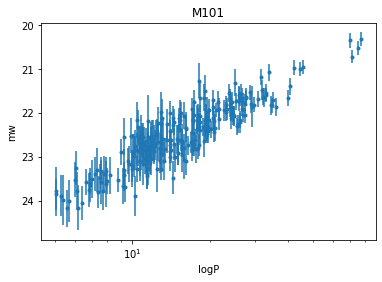

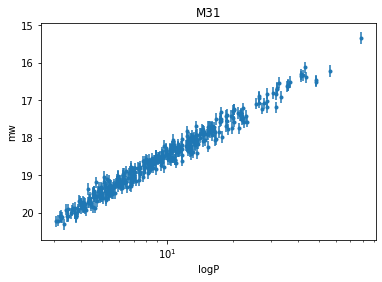

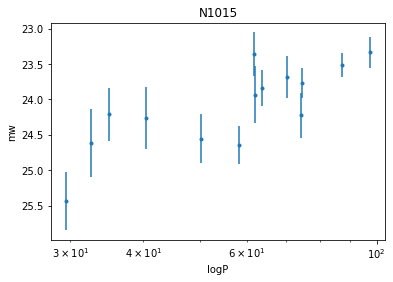

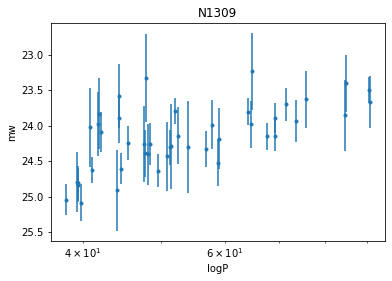

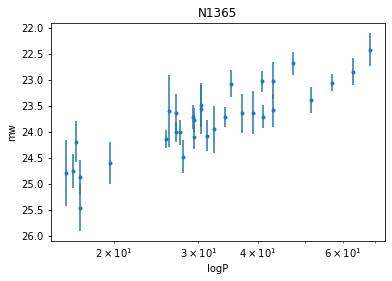

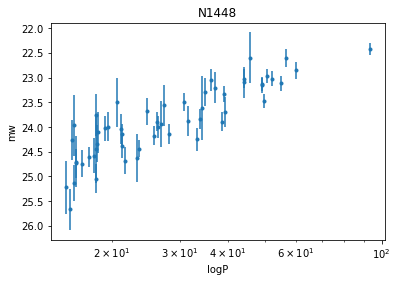

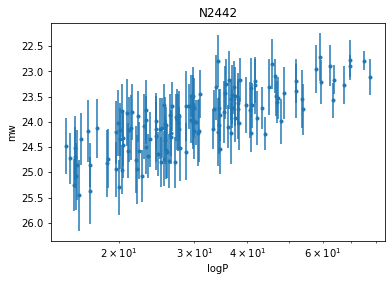

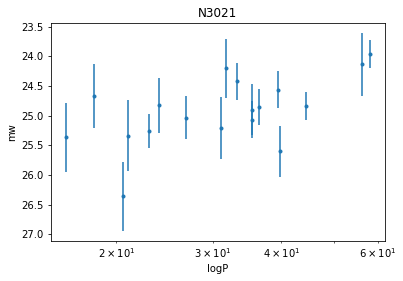

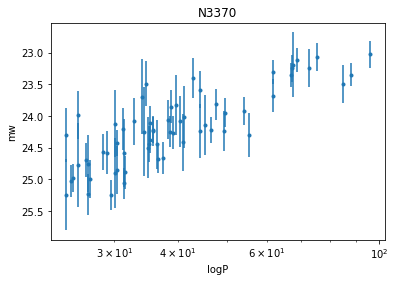

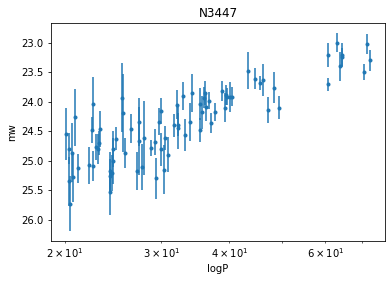

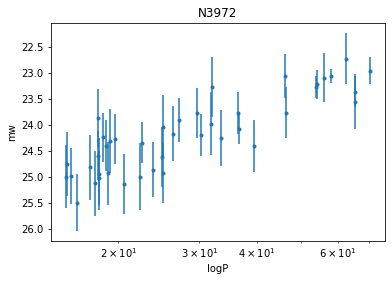

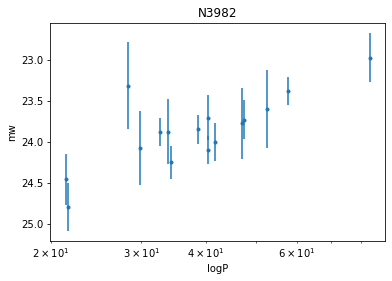

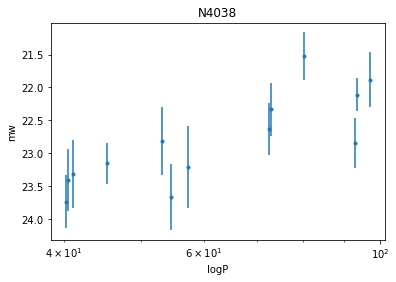

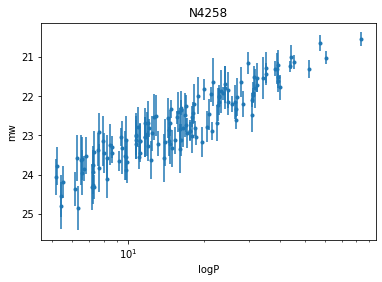

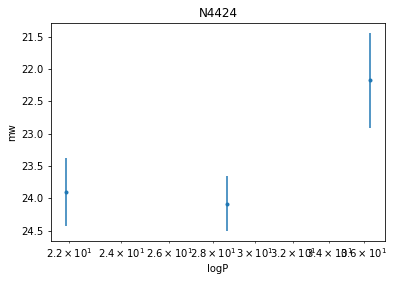

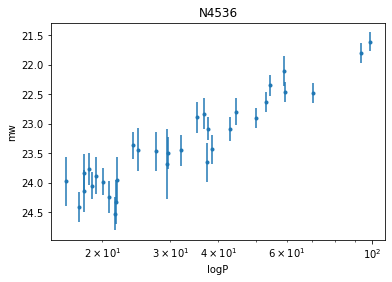

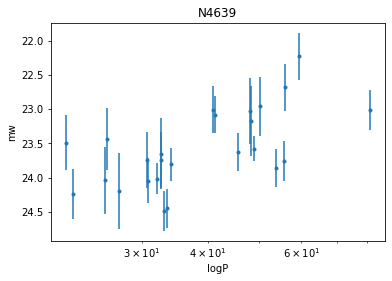

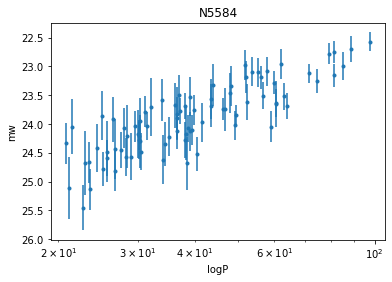

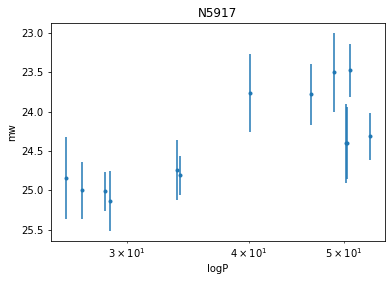

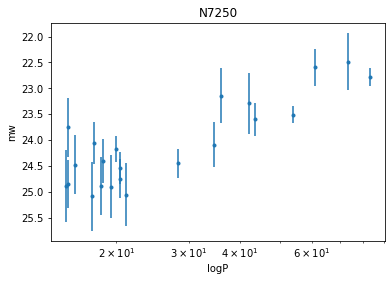

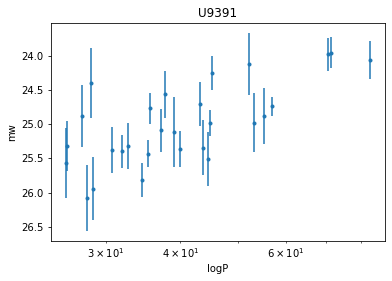

In [10]:
for host in host_list:
    cephe_list = data_cephe[data_cephe['Gal']== host]
    plt.figure()
    plt.title(host)
    plt.errorbar(cephe_list['Per'], cephe_list['mw'],yerr=cephe_list['sigTot'],fmt='.')
    plt.gca().invert_yaxis()
    plt.xscale('log')
    plt.xlabel('logP')
    plt.ylabel('mw')
plt.show()

### Fit without SN Ia and M31

In [11]:
data_woM31 = data_cephe[data_cephe['Gal'] != 'M31']

In [12]:
#res = mu_i-mu_4258, zpw4258, bw, Zw
n_params = 3

############################
#SN HOST CEPHEIDS and SN Ia#
############################
n_ceph_by_host = [len(data_woM31[data_woM31['Gal']== host]) for host in sn_host]
n_ceph = np.sum(n_ceph_by_host)
n_ceph_cumsum = np.concatenate(([0],np.cumsum(n_ceph_by_host)))
n_sn = len(sn_host)
L_ceph = np.zeros((n_ceph,n_sn+n_params))
L_sn = np.zeros((n_sn,n_sn+n_params))
y_ceph=np.zeros(n_ceph)
y_sn = np.zeros(n_sn)
cov_ceph=np.zeros(n_ceph)
cov_sn=np.zeros(n_sn)

for i,host in enumerate(sn_host):
    selec_ceph = data_woM31[data_woM31['Gal']== host]
    
    n_ceph_host = n_ceph_by_host[i]
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],i] = 1
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-3] = 1
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-2] = np.log10(selec_ceph['Per'])
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-1] = selec_ceph['[O/H]'] - 8.66

    
    y_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1]]= selec_ceph['mw'] 
    
    cov_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1]] = pw(selec_ceph['sigTot'],2) + 0.02

###################
#NGC 4258 CEPHEIDS#
###################
selec_ceph = data_woM31[data_woM31['Gal'] == 'N4258']
n_4258 = len(selec_ceph)
L_4258 = np.zeros((n_4258,n_sn+n_params))
L_4258[:,-3] = 1
L_4258[:,-2] = np.log10(selec_ceph['Per'])
L_4258[:,-1] = selec_ceph['[O/H]'] - 8.66

y_4258 = selec_ceph['mw']
cov_4258 = pw(selec_ceph['sigTot'],2) + 0.02


In [13]:
L = np.concatenate((L_ceph, L_4258))
y = np.concatenate((y_ceph, y_4258))
C = np.diag(np.concatenate((cov_ceph, cov_4258)))
print(f"nbr cepheids = {len(y_ceph)+len(y_4258)}")

nbr cepheids = 1114


In [14]:
C_inv = np.linalg.inv(C)
cov_res = np.linalg.inv(L.T @ C_inv @ L)
res = cov_res @ L.T @ C_inv @ y

err_fit = np.sqrt(np.diag(cov_res))

In [15]:
print(res)
print(err_fit)

[-0.17371801  3.06293843  3.10665416  1.93024379  1.92521474  2.1443888
  3.13003975  2.67286461  2.52576356  2.24208267  2.34207991  1.88562869
  1.73810282  1.52259656  2.13589482  2.37842897  2.856925    2.06926588
  3.51171533 26.42745865 -3.05758415 -0.20989443]
[0.0444912  0.09645888 0.06288043 0.06629178 0.05136714 0.05401155
 0.09993138 0.05481066 0.04786151 0.07894271 0.08288654 0.12486609
 0.31492222 0.06009121 0.07962576 0.05066659 0.11708777 0.09335091
 0.0723425  0.07315403 0.05042422 0.09265824]


In [16]:
for i,name in enumerate(sn_host):
    print(f"delta_mu_{name} = {res[i]:.3f} +/- {err_fit[i]:.3f}")

delta_mu_M101 = -0.174 +/- 0.044
delta_mu_N1015 = 3.063 +/- 0.096
delta_mu_N1309 = 3.107 +/- 0.063
delta_mu_N1365 = 1.930 +/- 0.066
delta_mu_N1448 = 1.925 +/- 0.051
delta_mu_N2442 = 2.144 +/- 0.054
delta_mu_N3021 = 3.130 +/- 0.100
delta_mu_N3370 = 2.673 +/- 0.055
delta_mu_N3447 = 2.526 +/- 0.048
delta_mu_N3972 = 2.242 +/- 0.079
delta_mu_N3982 = 2.342 +/- 0.083
delta_mu_N4038 = 1.886 +/- 0.125
delta_mu_N4424 = 1.738 +/- 0.315
delta_mu_N4536 = 1.523 +/- 0.060
delta_mu_N4639 = 2.136 +/- 0.080
delta_mu_N5584 = 2.378 +/- 0.051
delta_mu_N5917 = 2.857 +/- 0.117
delta_mu_N7250 = 2.069 +/- 0.093
delta_mu_U9391 = 3.512 +/- 0.072


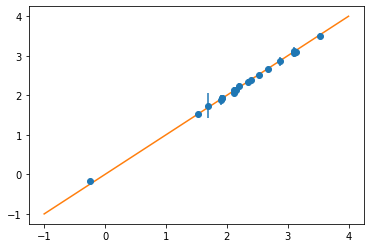

In [17]:
plt.figure(figsize=(6,4))

mu_mu4258_R = np.array([data_sn_R16[data_sn_R16['Gal']==name]['mu_i'][0] - mu_N4258   for name in sn_host])
mu_mu4258_fit = res[:len(sn_host)]

errors = err_fit[:len(sn_host)]
plt.errorbar(mu_mu4258_R,
          mu_mu4258_fit ,
          yerr=errors,marker='o',ls='None')
plt.plot([-1,4],[-1,4])
plt.show()

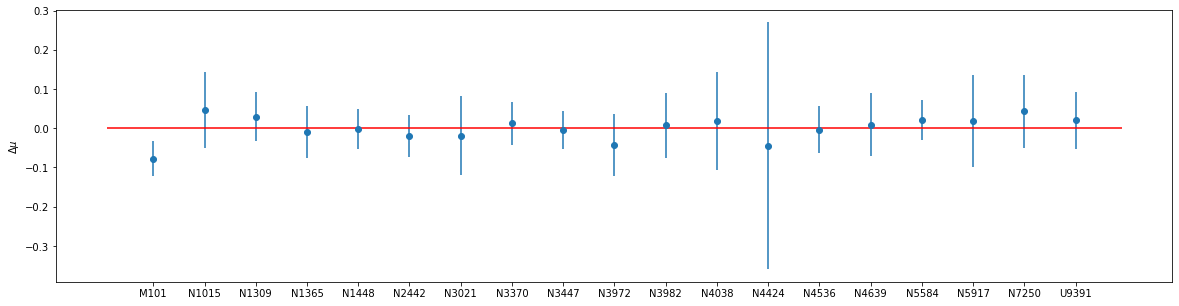

In [18]:
plt.figure(figsize=(20,5))
mu_mu4258_R = np.array([data_sn_R16[data_sn_R16['Gal']==name]['mu_i'][0] - mu_N4258 for name in sn_host])
mu_mu4258_fit = res[:len(sn_host)]

errors = err_fit[:len(sn_host)]
plt.errorbar(np.arange(len(sn_host)),
           mu_mu4258_R - mu_mu4258_fit ,
          yerr=errors,marker='o',ls='None')
plt.hlines(0,*xlim(),color='r')
plt.xticks(np.arange(len(sn_host)), sn_host)
plt.ylabel('$\Delta \mu$')
plt.show()

In [19]:
mB_R = data_sn_R16['mag+5a'][:]
print(mB_R)
print(mu_mu4258_fit)
print(mu_mu4258_R)
sig_mB = data_sn_R16['sig_mag+5a'][:]
mB_N4258 = numpy.sum((mB_R-mu_mu4258_fit)/(sig_mB**2.+errors**2.))/numpy.sum(1./(sig_mB**2.+errors**2.))
sig_mB_N4258= numpy.sqrt(1./numpy.sum(1./(sig_mB**2.+errors**2.)))

mag+5a
------
 13.31
17.015
16.756
15.482
15.765
 15.84
16.527
16.476
16.265
16.048
15.795
15.797
 15.11
15.177
15.983
16.265
16.572
15.867
17.034
[-0.17371801  3.06293843  3.10665416  1.93024379  1.92521474  2.1443888
  3.13003975  2.67286461  2.52576356  2.24208267  2.34207991  1.88562869
  1.73810282  1.52259656  2.13589482  2.37842897  2.856925    2.06926588
  3.51171533]
[-0.252  3.11   3.136  1.92   1.924  2.124  3.111  2.685  2.521  2.2
  2.35   1.903  1.693  1.519  2.145  2.399  2.876  2.112  3.532]


In [20]:
H0= 10**(0.2*(mB_N4258-mu_N4258+25.))
H0unc= H0*0.2*numpy.log(10.)*numpy.sqrt(sig_mB_N4258**2.+sig_mu_N4258**2.)
print("The Hubble constant is {:.2f} +/- {:.2f} km/s/Mpc"\
          .format(H0,H0unc))

The Hubble constant is 72.89 +/- 2.20 km/s/Mpc


In [65]:
def chi2_woM31(q):
    C_new = C + np.exp(q[-1])
    C_inv_new = np.linalg.inv(C_new)
    return (y-L @ q[:-1]).T @ C_inv_new @ (y-L.dot(q[:-1]))

In [72]:
names = np.concatenate((np.array([n for n in sn_host]),np.array(['zpw4258', 'bw', 'Zw','lnV'])))
print(len(names))
limits = [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,(-10,10)]
chimin_woM31 = Minuit.from_array_func(chi2_woM31, concatenate((res,[0.02])), errordef = 1, error=0.001, name=names, limit=limits)

23


In [74]:
chimin_woM31.migrad()
chimin_woM31.hesse()
chimin_woM31.minos()
print(chimin_woM31.params)
print(f'chi2={chimin_woM31.fval/(np.size(y)-np.size(res))}')

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | M101    |   -0.17   |   0.04    |   -0.04    |    0.04    |         |         |       |
| 1 | N1015   |   3.06    |   0.10    |   -0.10    |    0.10    |         |         |       |
| 2 | N1309   |   3.11    |   0.06    |   -0.06    |    0.06    |         |         |       |
| 3 | N1365   |   1.93    |   0.07    |   -0.07    |    0.07    |         |         |       |
| 4 | N1448   |   1.93    |   0.05    |   -0.05    |    0.05    |         |         |       |
| 5 | N2442   |   2.14    |   0.05    |   -0.05    |    0.05    |         |         |       |
| 6 | N3021   |   3.13    |   0.10    |   -0.10    |    0.10    |         |         |       |
| 7 | N3370   |   2.67    |   0.05    |   -0.05    |    0.05

### Fit with one anchor : NGC 4258 

#### Simple slop

In [ ]:
#res = mu_i-mu_4258, mu_M31-mu_4258, zpw4258, bw, Zw, m_4258
n_params = 5

############################
#SN HOST CEPHEIDS and SN Ia#
############################
n_ceph_by_host = [len(data_cephe[data_cephe['Gal']== host]) for host in sn_host]
n_ceph = np.sum(n_ceph_by_host)
n_ceph_cumsum = np.concatenate(([0],np.cumsum(n_ceph_by_host)))
n_sn = len(sn_host)
L_ceph = np.zeros((n_ceph,n_sn+n_params))
L_sn = np.zeros((n_sn,n_sn+n_params))
y_ceph=np.zeros(n_ceph)
y_sn = np.zeros(n_sn)
cov_ceph=np.zeros(n_ceph)
cov_sn=np.zeros(n_sn)

for i,host in enumerate(sn_host):
    selec_ceph = data_cephe[data_cephe['Gal']== host]
    
    n_ceph_host = n_ceph_by_host[i]
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],i] = 1
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-4] = 1
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-3] = np.log10(selec_ceph['Per'])
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-2] = selec_ceph['[O/H]'] - 8.66
    
    L_sn[i,i] = 1 
    L_sn[i,-1] = 1
    
    y_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1]]= selec_ceph['mw']
    y_sn[i] = data_sn_R16[data_sn_R16['Gal'] == host]['mB'] 
    
    cov_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1]] = pw(selec_ceph['sigTot'],2)
    cov_sn[i] = pw(data_sn_R16[data_sn_R16['Gal'] == host]['sig_mB'],2) 

###################
#NGC 4258 CEPHEIDS#
###################
selec_ceph = data_cephe[data_cephe['Gal'] == 'N4258']
n_4258 = len(selec_ceph)
L_4258 = np.zeros((n_4258,n_sn+n_params))
L_4258[:,-4] = 1
L_4258[:,-3] = np.log10(selec_ceph['Per'])
L_4258[:,-2] = selec_ceph['[O/H]'] - 8.66

y_4258 = selec_ceph['mw']
cov_4258 = pw(selec_ceph['sigTot'],2) 

##############
#M31 CEPHEIDS#
##############
selec_ceph = data_cephe[data_cephe['Gal'] == 'M31']
n_M31 = len(selec_ceph)
L_M31 = np.zeros((n_M31,n_sn+n_params))
L_M31[:,-5] = 1
L_M31[:,-4] = 1
L_M31[:,-3] = np.log10(selec_ceph['Per'])
L_M31[:,-2] = selec_ceph['[O/H]'] - 8.66
y_M31 = selec_ceph['mw']
cov_M31 = pw(selec_ceph['sigTot'],2) 

In [ ]:
L = np.concatenate((L_ceph, L_4258, L_M31, L_sn))
y = np.concatenate((y_ceph, y_4258, y_M31, y_sn))
C = np.diag(np.concatenate((cov_ceph, cov_4258, cov_M31, cov_sn)))
print(f"nbr cepheids = {len(y_ceph)+len(y_4258)+len(y_M31)}")

##### Fisher solution

In [ ]:
C_inv = np.linalg.inv(C)
cov_res = np.linalg.inv(L.T @ C_inv @ L)
res = cov_res @ L.T @ C_inv @ y

In [ ]:
print(res)
print(np.sqrt(np.diag(cov_res)))

In [ ]:
log_H0 = (res[-1]-mu_N4258+5*av+25)/5
sigma_log_H0 = np.sqrt(25*pw(sigma_av,2)+pw(sigma_mu_N4258,2)+cov_res[-1,-1])/5
H0 = pw(10,log_H0)
sigma_H0 = np.log(10)*H0*sigma_log_H0
print(f"logH0 = {log_H0} +/- {sigma_log_H0}")
print(f"H0 = {H0} +/- {sigma_H0}")

##### Minuit $\chi^2$ minimization

In [ ]:
def chi2_simp(q):
    return (y-L @ q).T @ C_inv @ (y-L.dot(q))

In [ ]:
names = np.concatenate((np.array([n for n in sn_host]),np.array(['mu_M31-mu_4248', 'zpw4258', 'bw', 'Zw', 'm_4258'])))
chimin_simp = Minuit.from_array_func(chi2_simp, res, errordef = 1, error=0.001, name=names)

In [ ]:
chimin_simp.migrad()
chimin_simp.hesse()
chimin_simp.minos()
print(chimin_simp.params)
print(f'chi2={chimin_simp.fval/(np.size(y)-np.size(res))}')

In [ ]:
log_H0 = (chimin_simp.np_values()[-1]-mu_N4258+5*aB+25)/5
sigma_log_H0 = np.sqrt(25*pw(sigma_aB,2)+pw(sigma_mu_N4258,2)+cov_res[-1,-1])/5
H0 = pw(10,log_H0)
sigma_H0 = np.log(10)*pw(10,log_H0)*sigma_log_H0
print(f"logH0 = {log_H0} +/- {sigma_log_H0}")
print(f"H0 = {H0} +/- {sigma_H0}")

##### Fit results plot

In [ ]:
mu_mu4258_fit = chimin_simp.np_values()[:len(sn_host)]
zp = chimin_simp.np_values()[-4]
bw = chimin_simp.np_values()[-3]
zw = chimin_simp.np_values()[-2]
for host,i in zip(sn_host,np.arange(len(sn_host))):
    cephe_list = data_cephe[data_cephe['Gal']== host]
    plt.figure()
    plt.title(host)
    plt.errorbar(cephe_list['Per'], cephe_list['mw'],yerr=cephe_list['sigTot'],fmt='.')
    p = np.linspace(np.min(cephe_list['Per'])-1,np.max(cephe_list['Per'])+1,1000)
    plt.plot(p,mu_mu4258_fit[i]+zp+bw*np.log10(p)+zw*np.mean(cephe_list['[O/H]']-8.66))
    plt.gca().invert_yaxis()
    plt.xscale('log')
    plt.xlabel('logP')
    plt.ylabel('mw')
plt.show()

In [ ]:
plt.figure(figsize=(20,4))
gals= set(data_sn_R16['Gal'])
mu_mu4258_R = np.array([data_sn_R16[data_sn_R16['Gal']==name]['mu_i'][0] - 29.387 for name in gals])
mu_mu4258_fit = chimin_simp.np_values()[:len(sn_host)]

err_fit = chimin_simp.np_errors()[:len(sn_host)]
plt.errorbar(np.arange(len(gals)),
          mu_mu4258_fit - mu_mu4258_R,
          yerr=err_fit,marker='o',ls='None')
plt.hlines(0,*xlim(),color='r')
plt.xticks(np.arange(len(gals)), gals)
plt.show()

#### Double slop

In [ ]:
#res = mu_i-mu_4258, mu_M31-mu_4258, zpw4258, bw, bl, Zw, m_4258
n_params = 6

############################
#SN HOST CEPHEIDS and SN Ia#
############################
n_ceph_by_host = [len(data_cephe[data_cephe['Gal']== host]) for host in sn_host]
n_ceph = np.sum(n_ceph_by_host)
n_ceph_cumsum = np.concatenate(([0],np.cumsum(n_ceph_by_host)))
n_sn = len(sn_host)
L_ceph = np.zeros((n_ceph,n_sn+n_params))
L_sn = np.zeros((n_sn,n_sn+n_params))
y_ceph=np.zeros(n_ceph)
y_sn = np.zeros(n_sn)
cov_ceph=np.zeros(n_ceph)
cov_sn=np.zeros(n_sn)

for i,host in enumerate(sn_host):
    selec_ceph = data_cephe[data_cephe['Gal'] == host]
    P_sup10 = selec_ceph['Per'] > 10
    P_inf10 = [not bool for bool in P_sup10]
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],i] = 1
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-5] = 1
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-4] = np.log10(selec_ceph['Per'])*P_sup10
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-3] = np.log10(selec_ceph['Per'])*P_inf10
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-2] = selec_ceph['[O/H]'] - 8.9
 
    L_sn[i,i] = 1
    L_sn[i,-1] = 1
    
    y_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1]] = selec_ceph['mw']
    y_sn[i] = data_sn_R16[data_sn_R16['Gal'] == host]['mB']
    
    cov_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1]] = pw(selec_ceph['sigTot'],2)
    cov_sn[i] = pw(data_sn_R16[data_sn_R16['Gal'] == host]['sig_mB'],2)

###################
#NGC 4258 CEPHEIDS#
###################
selec_ceph = data_cephe[data_cephe['Gal'] == 'N4258']
n_4258 = len(selec_ceph)
L_4258 = np.zeros((n_4258,n_sn+n_params))
P_sup10 = selec_ceph['Per'] > 10
P_inf10 = [not bool for bool in P_sup10]
L_4258[:,-5] = 1
L_4258[:,-4] = np.log10(selec_ceph['Per'])*P_sup10
L_4258[:,-3] = np.log10(selec_ceph['Per'])*P_inf10
L_4258[:,-2] = selec_ceph['[O/H]'] - 8.66

y_4258 = selec_ceph['mw']
cov_4258 = pw(selec_ceph['sigTot'],2)
  
##############
#M31 CEPHEIDS#
##############
selec_ceph = data_cephe[data_cephe['Gal'] == 'M31']
n_M31 = len(selec_ceph)
L_M31 = np.zeros((n_M31,n_sn+n_params))
P_sup10 = selec_ceph['Per'] > 10
P_inf10 = [not bool for bool in P_sup10]
L_M31[:,-6] = 1
L_M31[:,-5] = 1
L_M31[:,-4] = np.log10(selec_ceph['Per'])*P_sup10
L_M31[:,-3] = np.log10(selec_ceph['Per'])*P_inf10
L_M31[:,-2] = selec_ceph['[O/H]'] - 8.66

y_M31 = selec_ceph['mw']
cov_M31 = pw(selec_ceph['sigTot'],2)



In [ ]:
L = np.concatenate((L_ceph, L_4258, L_M31, L_sn))
y = np.concatenate((y_ceph, y_4258, y_M31, y_sn))
C = np.diag(np.concatenate((cov_ceph, cov_4258, cov_M31, cov_sn)))

##### Fisher solution

In [ ]:
C_inv = np.linalg.inv(C)
cov_res = np.linalg.inv(L.T @ C_inv @ L)
res = cov_res @ L.T @ C_inv @ y

chi2 = ((y-L @ res).T @ C_inv @ (y-L @ res))/(np.size(y)-np.size(res))

In [ ]:
print(res)
print(f'chi2 = {chi2}')

In [ ]:
log_H0 = (res[-1]-mu_N4258+5*av+25)/5
sigma_log_H0 = np.sqrt(25*pw(sigma_av,2)+pw(sigma_mu_N4258,2)+cov_res[-1,-1])/5
H0 = pw(10,log_H0)
sigma_H0 = np.log(10)*pw(10,log_H0)*sigma_log_H0
print(f"logH0 = {log_H0} +/- {sigma_log_H0}")
print(f"H0 = {H0} +/- {sigma_H0}")

##### Minuit $\chi^2$ minimization

In [ ]:
def chi2_doub(q):
    return (y-L @ q).T @ C_inv @ (y-L.dot(q))

In [ ]:
names = np.concatenate((np.array(["mu_{}_muN4258".format(n) for n in sn_host]),np.array(['mu_M31-mu_4248', 'zpw4258', 'bw', 'bl', 'Zw', 'm_4258'])))
chimin_doub = Minuit.from_array_func(chi2_simp, res, errordef = 1, error=0.001, name=names)

In [ ]:
chimin_doub.migrad()
chimin_doub.hesse()
chimin_doub.minos()
print(chimin_doub.params)
print(f'chi2={chimin_doub.fval/(np.size(y)-np.size(res))}')

In [ ]:
log_H0 = (chimin_doub.np_values()[-1]-mu_N4258+5*aB+25.)/5.
sigma_log_H0 = np.sqrt(25*pw(sigma_av,2)+pw(sigma_mu_N4258,2)+cov_res[-2,-2])/5
H0 = pw(10,log_H0)
sigma_H0 = np.log(10)*pw(10,log_H0)*sigma_log_H0
print(f"logH0 = {log_H0} +/- {sigma_log_H0}")
print(f"H0 = {H0} +/- {sigma_H0}")

#### Fit results plot

In [ ]:
mu_mu4258_fit = res[:n_sn]
zp = res[-5]
bw = res[-4]
zw = res[-2]
for host,i in zip(sn_host,np.arange(len(sn_host))):
    cephe_list = data_cephe[data_cephe['Field'] == host]
    plt.figure()
    plt.title(host)
    plt.errorbar(cephe_list['Per'], cephe_list['F160W']-R*cephe_list['F555W-F814W'],yerr=cephe_list['sigma_tot'],fmt='.')
    p = np.linspace(np.min(cephe_list['Per'])-1,np.max(cephe_list['Per'])+1,1000)
    plt.plot(p,mu_mu4258_fit[i]+zp+bw*np.log10(p)+zw*(np.mean(cephe_list['[O/H]'])))
    plt.gca().invert_yaxis()
    plt.xscale('log')
    plt.xlabel('logP')
    plt.ylabel('mw')
cephe_list = data_cephe[data_cephe['Field'] == b'M31']
plt.figure()
plt.title('M31')
plt.errorbar(cephe_list['Per'], cephe_list['F160W']-R*cephe_list['F555W-F814W'],yerr=cephe_list['sigma_tot'],fmt='.')
p = np.linspace(np.min(cephe_list['Per'])-1,np.max(cephe_list['Per'])+1,1000)
plt.plot(p,res[-6]+bw*np.log10(p)+zw*(np.mean(cephe_list['[O/H]'])))
plt.gca().invert_yaxis()
plt.xscale('log')
plt.xlabel('logP')
plt.ylabel('mw')
plt.show()

## Fit with 3 anchors - Work in progress

In [ ]:
#res = mu_i, Delta_mu4258, MW_H, Delta_muLMC, mu_M31, bw, bl, MB0, Zw, Delta_zp
n_params = 10

########################
#Ceph and SN in SN HOST#
########################

n_ceph_by_host = [len(data_cephe[data_cephe['Field']== host]) for host in sn_host]
n_ceph = np.sum(n_ceph_by_host)
n_ceph_cumsum = np.concatenate(([0],np.cumsum(n_ceph_by_host)))
n_sn = len(sn_host)
L_ceph = np.zeros((n_ceph,n_sn+n_params))
L_sn = np.zeros((n_sn,n_sn+n_params))
y_ceph=np.zeros(n_ceph)
y_sn = np.zeros(n_sn)
cov_ceph=np.zeros(n_ceph)
cov_sn=np.zeros(n_sn)

for i,host in enumerate(sn_host):
    selec_ceph = data_cephe[data_cephe['Field'] == host]
    P_sup10 = selec_ceph['Per'] > 10
    P_inf10 = [not bool for bool in P_sup10]
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],i] = 1
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-8] = 1
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-5] = np.log10(selec_ceph['Per'])*P_sup10
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-4] = np.log10(selec_ceph['Per'])*P_inf10
    L_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1],-2] = selec_ceph['[O/H]'] 
 
    L_sn[i,i] = 1
    L_sn[i,-3] = 1
    
    y_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1]] = selec_ceph['F160W']-R*selec_ceph['F555W-F814W']
    y_sn[i] = data_sn[data_sn['Field'] == host]['mag_5a'] - 5*av
    
    cov_ceph[n_ceph_cumsum[i]:n_ceph_cumsum[i+1]] = pw(selec_ceph['sigma_tot'],2)
    cov_sn[i] = pw(data_sn[data_sn['Field'] == host]['sigma_mag_5a'],2)-25*pw(sigma_av,2)
    
y_4258 = selec_ceph['F160W']-R*selec_ceph['F555W-F814W']
cov_4258 = pw(selec_ceph['sigma_tot'],2)


In [ ]:
##################
#Ceph in NGC 4258#
##################

selec_ceph = data_cephe[data_cephe['Field']== b'N4258']
n_4258 = len(selec_ceph)
L_4258 = np.zeros((n_4258,n_sn+n_params))
P_sup10 = selec_ceph['Per'] > 10
P_inf10 = [not bool for bool in P_sup10]
L_4258[:,-9] = 1
L_4258[:,-5] = np.log10(selec_ceph['Per'])*P_sup10
L_4258[:,-4] = np.log10(selec_ceph['Per'])*P_inf10
L_4258[:,-1] = selec_ceph['[O/H]'] 

y_4258 = selec_ceph['F160W']-R*selec_ceph['F555W-F814W']-mu_N4258
cov_4258 = pw(selec_ceph['sigma_tot'],2)+pw(sigma_mu_N4258,2)

In [ ]:
#############
#Ceph in M31#
#############

selec_ceph = data_cephe[data_cephe['Field']== b'M31']
n_M31 = len(selec_ceph)
L_M31 = np.zeros((n_M31,n_sn+n_params))
P_sup10 = selec_ceph['Per'] > 10
P_inf10 = [not bool for bool in P_sup10]
L_M31[:,-6] = 1
L_M31[:,-8] = 1
L_M31[:,-5] = np.log10(selec_ceph['Per'])*P_sup10
L_M31[:,-4] = np.log10(selec_ceph['Per'])*P_inf10
L_M31[:,-2] = selec_ceph['[O/H]'] 

y_M31 = selec_ceph['F160W']-R*selec_ceph['F555W-F814W']
cov_M31 = pw(selec_ceph['sigma_tot'],2)


L = np.concatenate((L_ceph,L_sn),axis=0)
y = np.concatenate((y_ceph,y_sn))
C = np.diag(np.concatenate((cov_ceph,cov_sn)))

In [ ]:
############
#Ceph in MW#
############

selec_ceph = data_cephe[data_cephe['Field']== b'MW']
n_MW = len(selec_ceph)
L_MW = np.zeros((n_MW,n_sn+n_params))
P_sup10 = selec_ceph['Per'] > 10
P_inf10 = [not bool for bool in P_sup10]
L_MW[:,-6] = 1
L_MW[:,-8] = 1
L_MW[:,-5] = np.log10(selec_ceph['Per'])*P_sup10
L_MW[:,-4] = np.log10(selec_ceph['Per'])*P_inf10
L_MW[:,-2] = selec_ceph['[O/H]'] 

y_MW = selec_ceph['F160W']-R*selec_ceph['F555W-F814W']
cov_MW = pw(selec_ceph['sigma_tot'],2)
